# Crop Prediction System

## Introduction

Agriculture underpins the livelihoods of over 2.5billion people worldwide. Given the sector's innate interactions with the environment, its direct reliance on natural resources for production, and its significance for national socio-economic development, urgent ambitious action is needed to build more resilient agricultural systems.

## Problem Statement 
Having to merely determine what crop plant is best fit for planting on a particular piece of land can be very tedious and inaccurate task. When farmers eventually go through the stress of determining what crop to plant, after planting it, they discover that the crop isn't doing well due many factors with the soil and the environment. This causes the seedlings, time, energy, and money spent on the farm project to be wasted, thereby discouraging the farmers.

## The Solution
Agropredict helps agriculturists guide through the farming process, we use cutting-edge machine learning solutions. To ensure that farmer's crop is healthy and yields are bountiful, agriculturists need to understand  their area's demographic and factors affecting their crop to make informed decisions.

## Contents

[1. Import Libraries](#1.-Import-Libraries)

[2. Import Dataset](#2.-Import-Dataset)

[3. Data Cleaning and Exploration](#3.-Data-Cleaning-and-Exploration)

[4. Machine Learning Algorithms](#4.-Machine-Learning-Algorithms)

[5. K-Nearest Neighbors](#5.-K-Nearest-Neighbors)

[6. Support Vector Machine](#6.-Support-Vector-Machine)

[7. Logistic Regression](#7.-Logistic-Regression)

[8. Decision Tree](#8.-Decision-Tree)

[9. Random Forest](#9.-Random-Forest)

[10. Gaussian Naive Bayes](#10.-Gaussian-Naive-Bayes)

## 1. Import Libraries
Importing all the librabries needed for the project

In [1]:
import numpy as np    # Library to handle data in a vectorized manner.
import pandas as pd   # Library for data analysis.
import matplotlib.pyplot as plt # Library for matplotlib visualization.
import seaborn as sns  # Library data visualization and statistical plots.
%matplotlib inline

## 2. Import Dataset

In this section, we read the csv file (with pandas) containing the dataset into a pandas dataframe. The dataset contains measurement from different soil and which crop would be very suitable to plant on it. The measurements are based on; N(Nitrogen), P(Phosphorous), K(Potassium), temperature, humidity, pH, and rainfall of each soil.

In [2]:
crops = pd.read_csv('crop_recommendation.csv')

In [3]:
crops.head() # Checking the top 5 rows of the dataset.

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


### Data Fields

- N - ratio of Nitrogen content in soil - kg/ha

- P - ratio of Phosphorous content in soil - kg/ha

- K - ratio of Potassium content in soil - kg/ha

- temperature - temperature in degree Celsius

- humidity - relative humidity in %

- ph - ph value of the soil

- rainfall - rainfall in mm

## 3. Data Cleaning and Exploration

The dataset imported was processed for further cleaning and analysis. Checked for the general info of the dataset (total entries, number of columns, column type,etc.). Also, checked for null values to be handled but, the dataset does not contain any null value. We also analysed the data based on the different features and also  made  some visulaizations to show how the data really looks like.

### Data Analysis

In [9]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
crops.describe() # Checking the important statistical measurements for all numerical columns.

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
# Displaying the number of labels and their occurrence.
print(f'Number of labels: {crops["crop"].nunique()} \n\n{crops["crop"].value_counts()}')

Number of labels: 22 

Black Gram      100
Lentil          100
Apple           100
Maize           100
Mango           100
Pomegranate     100
Chickpea        100
Pawpaw          100
Watermelon      100
Moth Beans      100
Banana          100
Muskmelon       100
Cotton          100
Coconut         100
Coffee          100
Mung Beans      100
Pigeon Peas     100
Kidney Beans    100
Orange          100
Rice            100
Jute            100
Grapes          100
Name: crop, dtype: int64


In [12]:
crops.isnull().sum() # Checking for null values.

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [4]:
column_values = crops.columns # Saving our column values to a list and saving the list to variable.
column_values 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [5]:
df = crops.drop(labels='crop',axis=1) # Dropping the crop column to a dataframe of only our features.
df_columns = df.columns # Saving the columns to a list and the list to a variable.
df_columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

### Data Visualization

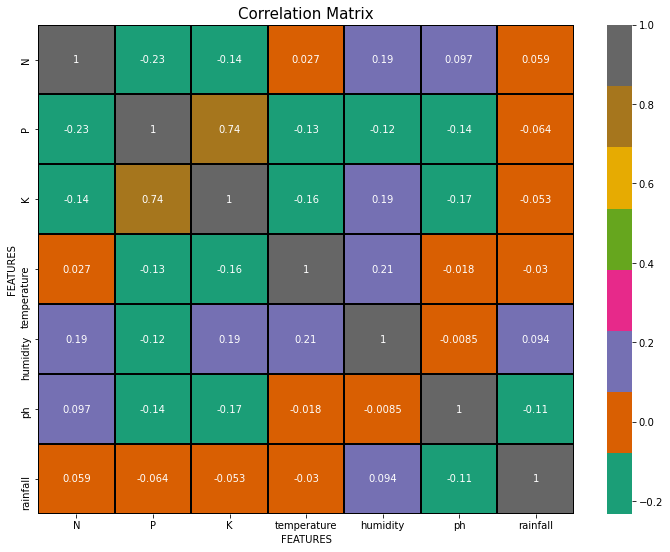

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,9))
sns.heatmap(crops.corr(),annot=True,cmap='Dark2',linecolor='black',linewidths=1)
ax.set(xlabel='FEATURES',ylabel='FEATURES')

plt.title('Correlation Matrix', fontsize=15)
plt.show()
filename = 'Correlation Heatmap'
plt.savefig(filename+'.jpeg', facecolor='white')

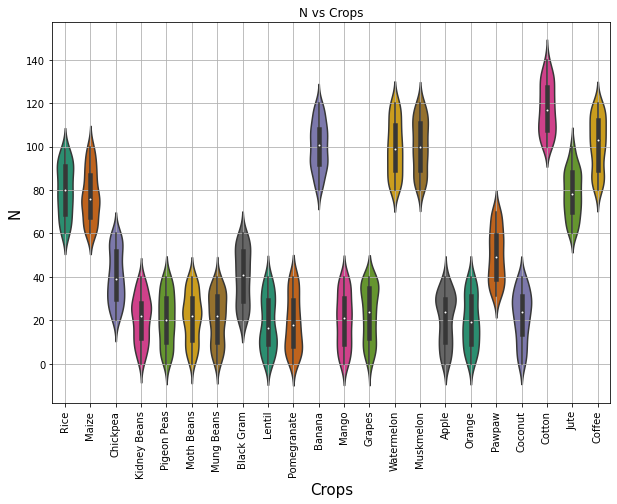

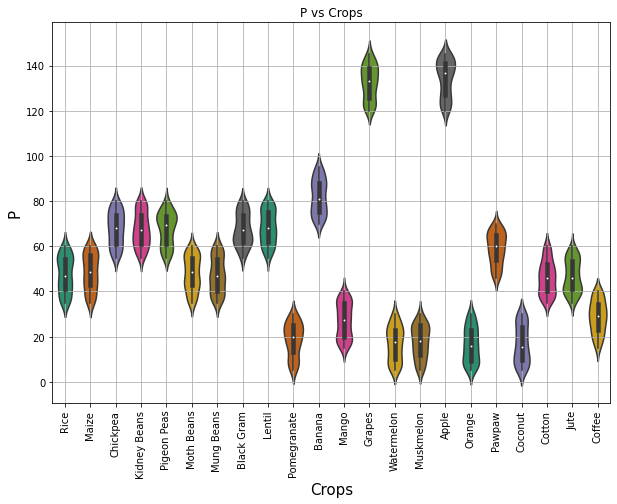

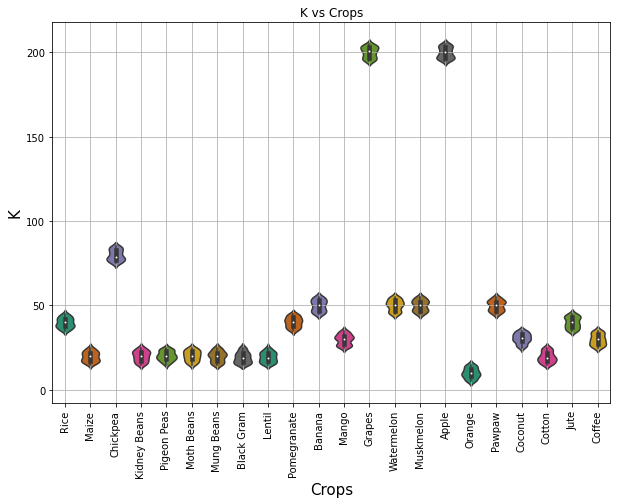

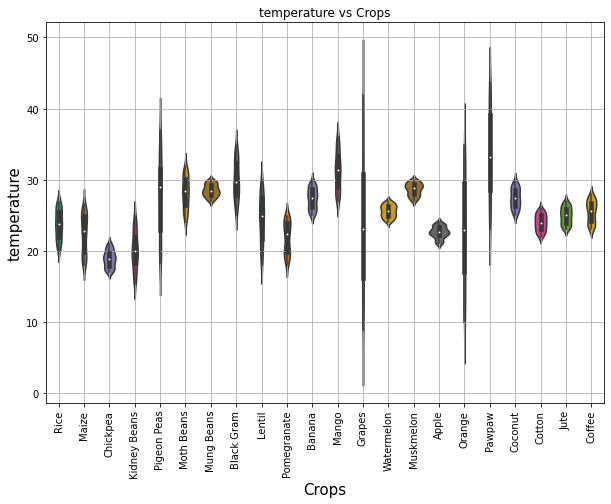

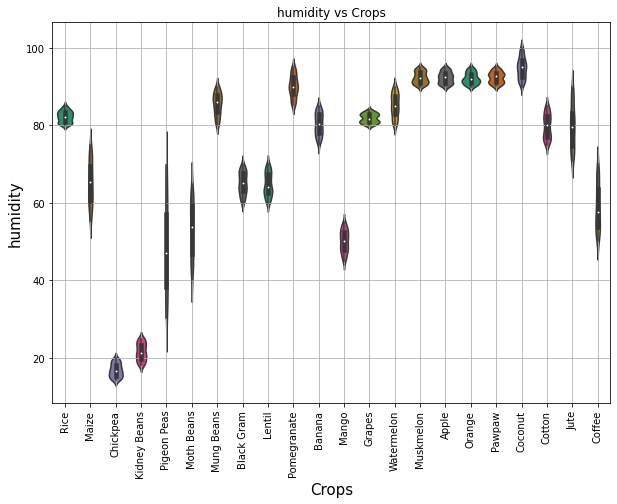

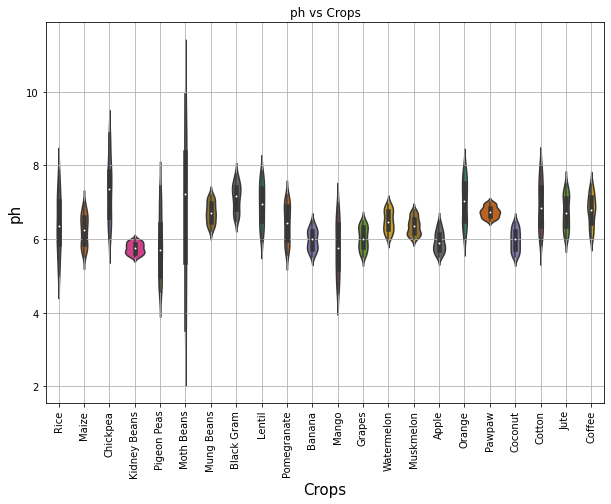

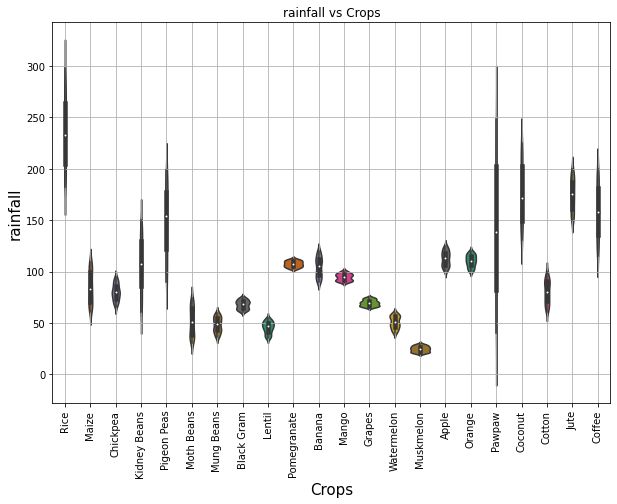

In [129]:
for column in df_columns:
    plt.figure(figsize=(10,7))
    sns.violinplot(x='crop',y=column,data=crops,palette='Dark2')
    plt.xlabel('Crops',fontsize=15)
    plt.xticks(rotation=90)
    plt.grid()
    plt.ylabel(f'{column}',fontsize=15)
    plt.title(f'{column} vs Crops')
#     plt.legend()
    plt.show()

#### Insight
- From the violin plots above, we can see the various distribution of each crop to each of the features in our dataset.
- We can also see the mean or average point of each crop on the each of our features.
- Also the main concentration of our data can be visualized.

## 4. Machine Learning Algorithms

We used different machine learning algorithms for classification. The algorithms we used are K-Nearest Neighbors, Support Vector Machines, Logistic Regression, Decision Tree, Random Forest, Gaussian Naive Bayes. We tested different values for K in the K-Nearest Neighbors and plot a graph of the accuracy of each values against the k-values to know our best value for k. Also we used a confusion matrix alongside the accuracy of each model(which we plotted in a graph), to decide which algorithm best fits the our data.

In [10]:
# Importing the various libraries needed to build our machine learning model.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

## 5. K-Nearest Neighbors

In [11]:
X = df # Assigning our dataframe containing our features to variable X.
y = crops['crop'] # Assigning our labels to variable y.

# Splitting our dataset into a train set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
k_value = list(range(1,51)) # Range for our k-values.
accuracy_value = [] # List holding our accuracies for each k-value.

for i in (k_value): # Looping through our range of k-values.
    knn = KNeighborsClassifier(n_neighbors=i) # Creating an instance of kneighbors class.
    knn.fit(X_train,y_train) # Training our model with the training set.
    y_predict = knn.predict(X_test) # Testing our model by prediciting a new value from our test set.
    accuracy = accuracy_score(y_test,y_predict) # Checking the accuracy of our model.
    accuracy_value.append(accuracy) # Storing our accuracy in a list for plotting.

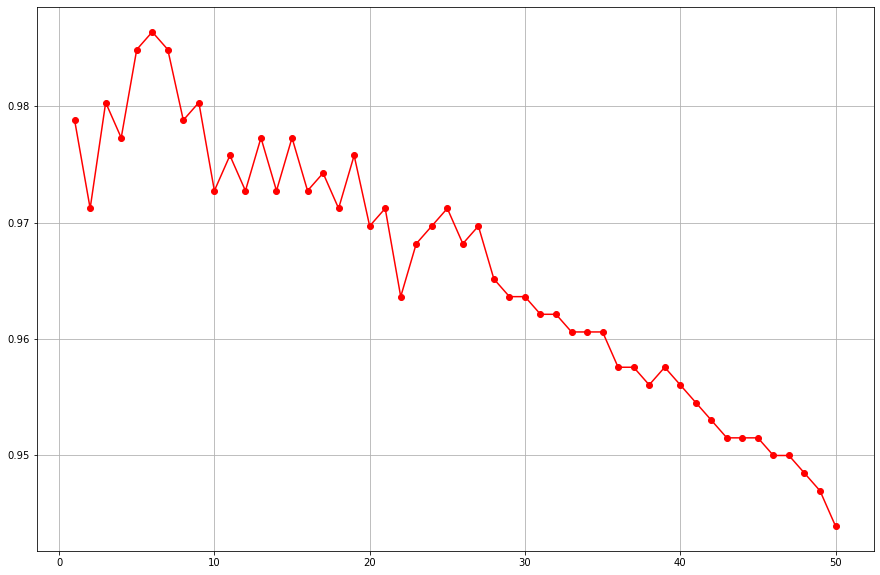

In [13]:
# Plotting a graph of accuracies against different k-values.
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.plot(k_value,accuracy_value, "-o", color = "red")
plt.grid()

#### Insight
- From our graph above we can see that our best value for k lies between 0-10. So we can easily conclude on 5 as our best value for k.

In [68]:
# Creating a model of our best value for k.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_predict)
print(f'Accuracy: {accuracy_score(y_test,y_predict)}')

Accuracy: 0.9848484848484849


In [27]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       1.00      1.00      1.00        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        31
      Coffee       1.00      1.00      1.00        33
      Cotton       0.97      1.00      0.98        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.91      0.88      0.89        33
Kidney Beans       0.97      1.00      0.98        30
      Lentil       0.97      1.00      0.98        32
       Maize       1.00      0.97      0.98        32
       Mango       1.00      1.00      1.00        33
  Moth Beans       1.00      0.97      0.98        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       1.00    

Classification report shows other calssification metrics such as precision and recall. Using accuracy metrics to determine the performance of model will not be enough. We will need to use other metrics which punish errors of imbalance labels in the test data.
- Precision is the ability of a model of identify only relevant data point. It is defined as the number of true positives divided by the number of true positives plus the number of false positives.
- Recall is ability of a model to find all relevant cases within a dataset. The precies definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives.
- F1-score this is essentially the combination of both, in cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score.
- Support is showing the number of prediction results we got from in each class.


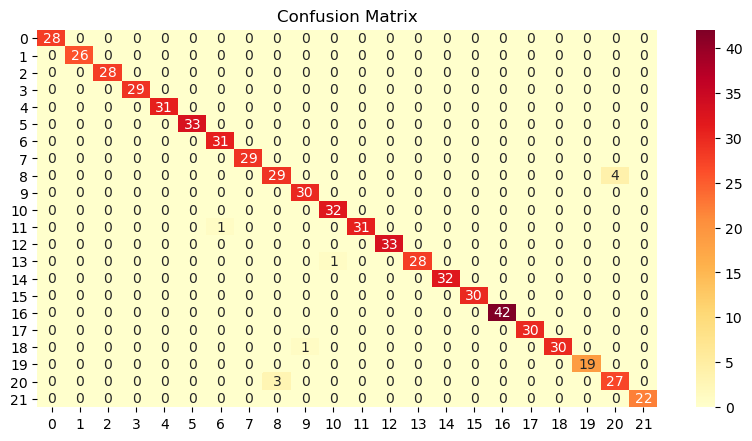

In [61]:
confusion = confusion_matrix(y_test, knn_predict) # Checking for our confusion matrix.

# Plotting a graph for our confusion matrix.
plt.figure(figsize=[10,5], dpi = 100)
plt.title('Confusion Matrix')
sns.heatmap(confusion, cmap="YlOrRd", annot=True)
plt.show()

## 6. Support Vector Machine

In [35]:
svc = SVC(gamma = "scale", kernel = "rbf")
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_predict)
svc_name = ("Support Vector Machine")
print(f"Accuracy: {svc_accuracy}")

Accuracy: 0.9803030303030303


In [36]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       0.97      1.00      0.98        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        31
      Coffee       1.00      1.00      1.00        33
      Cotton       0.97      1.00      0.98        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.85      1.00      0.92        33
Kidney Beans       0.91      1.00      0.95        30
      Lentil       0.94      1.00      0.97        32
       Maize       1.00      0.97      0.98        32
       Mango       1.00      1.00      1.00        33
  Moth Beans       1.00      0.90      0.95        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       1.00    

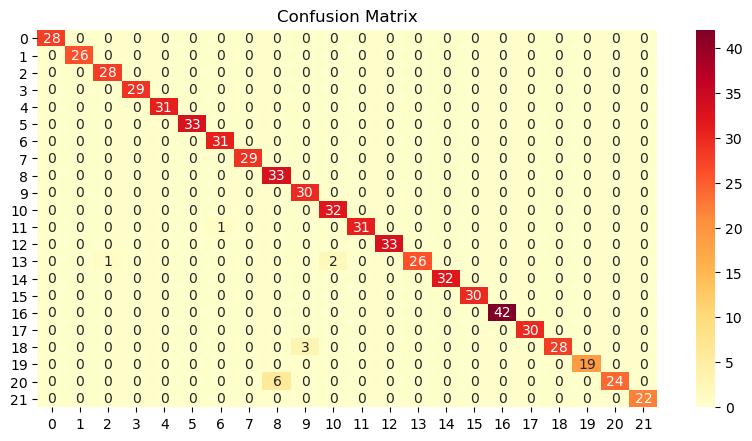

In [60]:
confusion = confusion_matrix(y_test, svc_predict)

plt.figure(figsize=[10,5], dpi = 100)
plt.title('Confusion Matrix')
sns.heatmap(confusion, cmap="YlOrRd", annot = True)
plt.show()

## 7. Logistic Regression

In [74]:
reg = LogisticRegression(random_state = 2)

reg.fit(X_train, y_train)
lr_predict = reg.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predict)
lr_name = ("Logistic Regression")

# data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
# prediction = reg.predict(data)
# print(prediction)

print(f"Accuracy: {lr_accuracy}")


Accuracy: 0.9621212121212122


In [42]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       0.92      0.82      0.87        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        31
      Coffee       1.00      1.00      1.00        33
      Cotton       0.91      0.94      0.92        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.86      0.94      0.90        33
Kidney Beans       0.97      1.00      0.98        30
      Lentil       0.91      1.00      0.96        32
       Maize       0.94      0.91      0.92        32
       Mango       0.97      1.00      0.99        33
  Moth Beans       0.83      0.83      0.83        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       0.97    

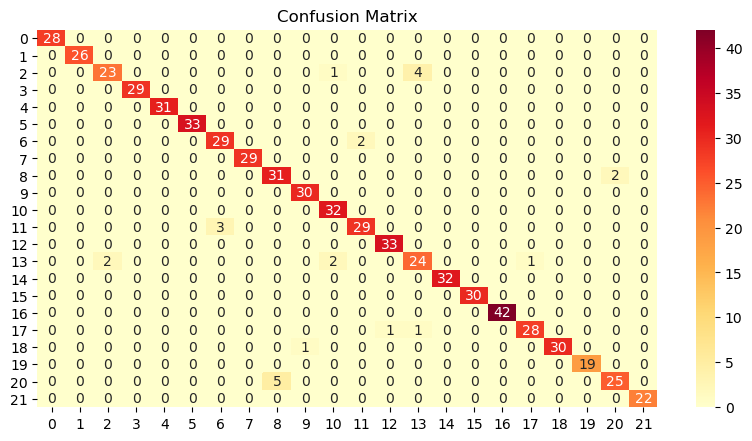

In [59]:
confusion = confusion_matrix(y_test, lr_predict)

plt.figure(figsize=[10,5], dpi = 100)
plt.title('Confusion Matrix')
sns.heatmap(confusion, cmap="YlOrRd", annot = True)
plt.show()

## 8. Decision Tree

In [75]:
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 2, max_depth = 5)
dtc.fit(X_train, y_train)
dt_predict = dtc.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predict)
dt_name = ("Decision Tree")
print(f"Accuracy: {dt_accuracy}")

Accuracy: 0.8590909090909091


In [76]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       0.65      1.00      0.79        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       0.94      1.00      0.97        31
      Coffee       1.00      1.00      1.00        33
      Cotton       1.00      0.97      0.98        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.50      0.03      0.06        33
Kidney Beans       0.00      0.00      0.00        30
      Lentil       0.63      1.00      0.77        32
       Maize       0.97      1.00      0.98        32
       Mango       1.00      1.00      1.00        33
  Moth Beans       0.00      0.00      0.00        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       1.00    

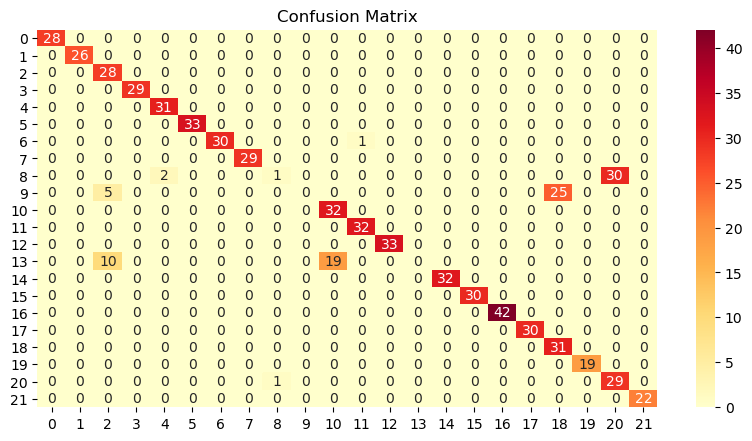

In [52]:
confusion = confusion_matrix(y_test, dt_predict)

plt.figure(figsize=[10,5], dpi = 100)
plt.title('Confusion Matrix')
sns.heatmap(confusion, cmap="YlOrRd", annot = True)
plt.show()

## 9. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 20, random_state = 2)
rfc.fit(X_train, y_train)
rf_predict = rfc.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predict)
rf_name = ("Random Forest")
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.9954545454545455


In [55]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       1.00      1.00      1.00        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        31
      Coffee       1.00      1.00      1.00        33
      Cotton       1.00      1.00      1.00        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.97      0.94      0.95        33
Kidney Beans       1.00      1.00      1.00        30
      Lentil       1.00      1.00      1.00        32
       Maize       1.00      1.00      1.00        32
       Mango       1.00      1.00      1.00        33
  Moth Beans       1.00      1.00      1.00        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       1.00    

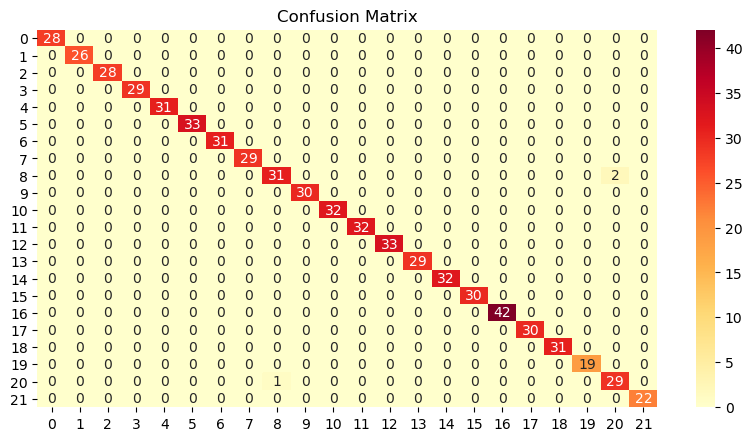

In [58]:
confusion = confusion_matrix(y_test, rf_predict)

plt.figure(figsize=[10,5], dpi = 100)
plt.title('Confusion Matrix')
sns.heatmap(confusion, cmap="YlOrRd", annot = True)
plt.show()

## 10. Gaussian Naive Bayes

In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gn_predict = gnb.predict(X_test)

gn_accuracy = accuracy_score(y_test, gn_predict)
gn_name = ("Gaussian Naive Bayes")
print(f"Accuracy: {gn_accuracy}")

Accuracy: 0.9924242424242424


In [65]:
print(classification_report(y_test, gn_predict))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        26
  Black Gram       1.00      1.00      1.00        28
    Chickpea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        31
      Coffee       1.00      1.00      1.00        33
      Cotton       1.00      1.00      1.00        31
      Grapes       1.00      1.00      1.00        29
        Jute       0.89      0.97      0.93        33
Kidney Beans       1.00      1.00      1.00        30
      Lentil       1.00      1.00      1.00        32
       Maize       1.00      1.00      1.00        32
       Mango       1.00      1.00      1.00        33
  Moth Beans       1.00      1.00      1.00        29
  Mung Beans       1.00      1.00      1.00        32
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        42
      Pawpaw       1.00    

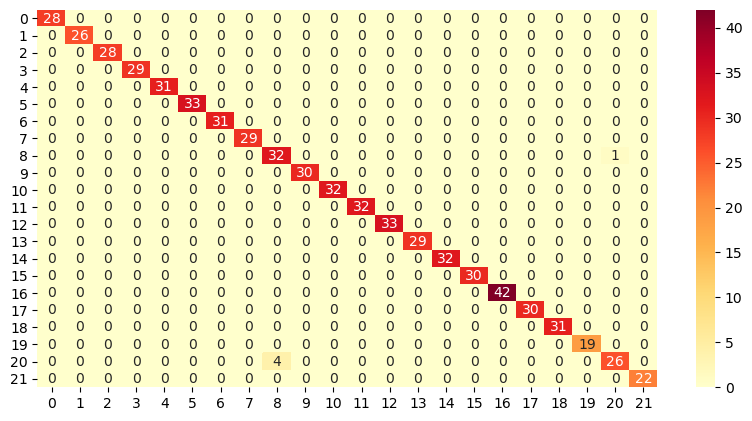

In [66]:
confusion = confusion_matrix(y_test, gn_predict)

plt.figure(figsize=[10,5], dpi = 100)
sns.heatmap(confusion, cmap="YlOrRd", annot = True)
plt.show()

C:\Users\Alu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


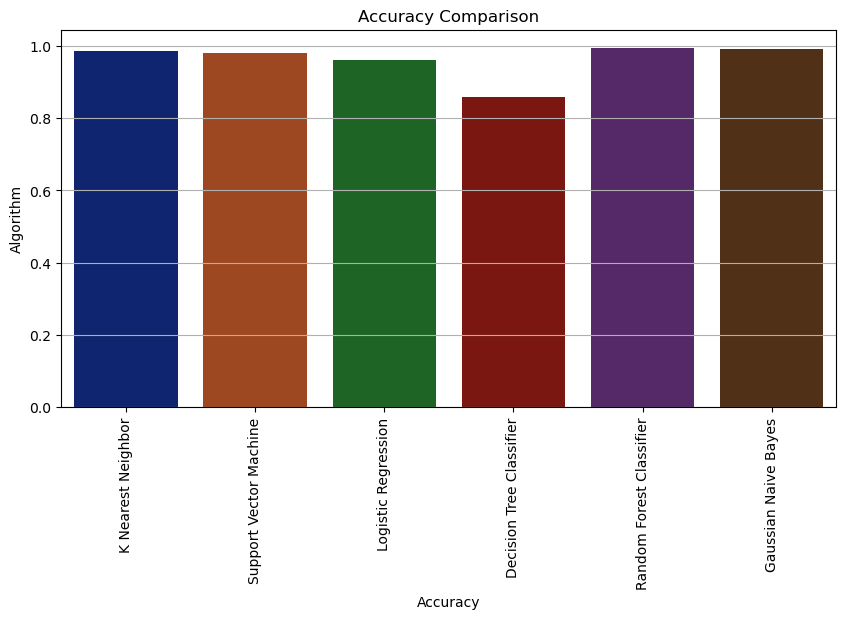

In [71]:
x = [knn_accuracy, svc_accuracy, lr_accuracy, dt_accuracy, rf_accuracy, gn_accuracy]
y = ["K Nearest Neighbor", "Support Vector Machine", "Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "Gaussian Naive Bayes"]


plt.figure(figsize=[10,5],dpi = 100)
plt.title("Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.grid()
plt.xticks(rotation=90)
sns.barplot(y, x, palette = "dark")
plt.show()